In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file='Stats/Stats.json'

In [6]:
def get_dataframe_from_stats_json(json_file):
  with open(json_file,'r') as json_data:
    json_stats=json.load(json_data)
  
  data1=list()
    
  total_read=None
  for row in json_stats['ConversionResults']:
    lane=row['LaneNumber']
    total_read=row['TotalClustersPF']
    for sample in row['DemuxResults']:
        sample_id=sample['SampleId']
        number_reads=sample['NumberReads']
        for index in sample['IndexMetrics']:
            index_seq=index['IndexSequence']
            data1.append({'lane':lane,'sample':sample_id,'index':index_seq,'reads':number_reads})
  df1=pd.DataFrame(data1)
  df1=df1.sort_values(['reads'],ascending=True).head(30)
  
  data2=list()
  for row in json_stats['UnknownBarcodes']:
    lane=row['Lane']
    max_index=10
    index_count=0
    for barcode,count in sorted(row['Barcodes'].items(), key=lambda x: x[1], reverse=True):
      index_count +=1
      if index_count < max_index:
        data2.append({'lane':lane,'sample':'undetermined','index':barcode,'reads':count})     
        
  df2=pd.DataFrame(data2)
  df=pd.concat([df1,df2])
  df['mapping_ratio']=df['reads'].map(lambda x: x/total_read)
  return df

In [7]:
data=get_dataframe_from_stats_json(json_file=file)

In [8]:
data

,index,lane,reads,sample,mapping_ratio
0,ACATCGAT,4,2874146,IGF0009189_1,0.065216
2,GATCTGAT,4,3050135,IGF0009189_3,0.069209
1,ATTGGCAT,4,3209658,IGF0009189_2,0.072829
3,TACAAGAT,4,3275797,IGF0009189_4,0.074330
4,TTTCACAT,4,3986532,IGF0009189_5,0.090457
0,GTATGCCG,4,26401420,undetermined,0.599064
1,GTATGCCC,4,260378,undetermined,0.005908
2,CCCCCCCC,4,98736,undetermined,0.002240
3,GTATGTCG,4,47132,undetermined,0.001069
4,GTATGACG,4,46667,undetermined,0.001059


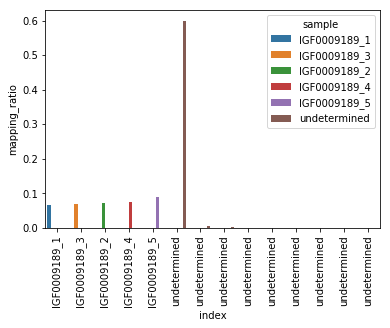

In [9]:
fig, ax=plt.subplots()
ax=sns.barplot(data=data, x='index',y='mapping_ratio',hue='sample')
labels=ax.set_xticklabels(data['sample'],rotation=90)
plt.show()

In [10]:
data=get_dataframe_from_stats_json(json_file='atanur_Stats.json')

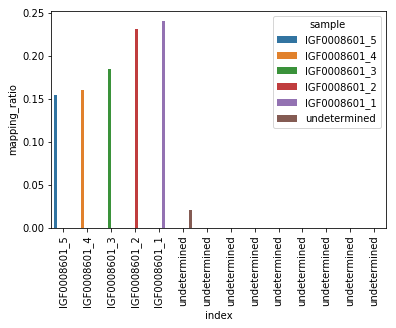

In [11]:
fig, ax=plt.subplots()
ax=sns.barplot(data=data, x='index',y='mapping_ratio',hue='sample')
labels=ax.set_xticklabels(data['sample'],rotation=90)
plt.show()

In [12]:
data=get_dataframe_from_stats_json(json_file='fisher_6-7-2017_amplicon_Stats.json')

In [15]:
#data

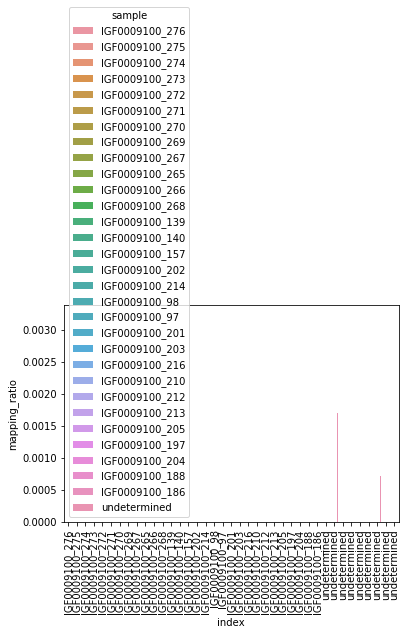

In [14]:
fig, ax=plt.subplots()
ax=sns.barplot(data=data, x='index',y='mapping_ratio',hue='sample')
labels=ax.set_xticklabels(data['sample'],rotation=90)
plt.show()

In [199]:
def get_dataframe_from_stats_json(json_file):
  with open(json_file,'r') as json_data:
    json_stats=json.load(json_data)
  
  data1=list()
  runid=json_stats['RunId']  
  total_read=None
  for row in json_stats['ConversionResults']:
    lane=row['LaneNumber']
    total_read=row['TotalClustersPF']
    for sample in row['DemuxResults']:
        sample_id=sample['SampleId']
        number_reads=sample['NumberReads']
        for index in sample['IndexMetrics']:
            index_seq=index['IndexSequence']
            data1.append({'lane':lane,
                          'sample':sample_id,
                          'index':index_seq,
                          'reads':number_reads,
                          'tag':'known',
                          'runid':runid,
                          'total_read':total_read})
  df1=pd.DataFrame(data1)
  df1=df1.sort_values(['reads'],ascending=True)
  
  data2=list()
  for row in json_stats['UnknownBarcodes']:
    lane=row['Lane']
    max_index=10
    index_count=0
    for barcode,count in sorted(row['Barcodes'].items(), key=lambda x: x[1], reverse=True):
        data2.append({'lane':lane,
                      'sample':'undetermined',
                      'index':barcode,
                      'reads':count,
                      'tag':'unknown',
                      'runid':runid,
                      'total_read':total_read})     
        
  df2=pd.DataFrame(data2)
  df=pd.concat([df1,df2])
  df['mapping_ratio']=df['reads'].map(lambda x: x/total_read)
  return df

In [200]:
data1=get_dataframe_from_stats_json(json_file='../../test_dir/stats_parsing/atanur_3-7-2017_starr_Stats.json')

In [201]:
data2=get_dataframe_from_stats_json(json_file='../../test_dir/stats_parsing/ferrer_10-8-2017_CRISPR_4_8_Stats.json')

In [202]:
data3=get_dataframe_from_stats_json(json_file='../../test_dir/stats_parsing/fisher_6-7-2017_amplicon_1_16_Stats.json')

In [203]:
data=pd.concat([data1,data2,data3])

In [204]:
data.head()

,index,lane,reads,runid,sample,tag,total_read,mapping_ratio
4,ACTTGA,6,64015463,170908_K00345_0020_AHJMN5BBXX,IGF0008601_5,known,413800538,0.154701
3,GCCAAT,6,66220700,170908_K00345_0020_AHJMN5BBXX,IGF0008601_4,known,413800538,0.160030
2,ACAGTG,6,76514482,170908_K00345_0020_AHJMN5BBXX,IGF0008601_3,known,413800538,0.184907
1,TGACCA,6,95437540,170908_K00345_0020_AHJMN5BBXX,IGF0008601_2,known,413800538,0.230637
0,CGATGT,6,99450906,170908_K00345_0020_AHJMN5BBXX,IGF0008601_1,known,413800538,0.240335


In [179]:
summary_df=data.pivot_table(values=['reads'],index=['tag','lane','runid'],aggfunc=np.sum)

In [180]:
summary_df

reads
tag     lane runid                                        
known   1    170714_M03291_0074_000000000-AV4VF   11652742
        4    170908_K00345_0020_AHJMN5BBXX        16396268
        6    170908_K00345_0020_AHJMN5BBXX       401639091
unknown 1    170714_M03291_0074_000000000-AV4VF     958479
        4    170908_K00345_0020_AHJMN5BBXX        27595744
        6    170908_K00345_0020_AHJMN5BBXX        12105689

In [181]:
processed_df=pd.DataFrame(columns=['id','known_read','unknown_read'])

In [182]:
processed_df

,id,known_read,unknown_read


In [183]:
for rid, rg in summary_df.groupby('runid'):
    for lid, lg in rg.groupby('lane'):
        known_reads=lg.loc['known']['reads'].values[0]
        unknown_reads=lg.loc['unknown']['reads'].values[0]
        runid='{0}_{1}'.format(rid, lid)
        df=pd.DataFrame([{'id':runid,'known_read':known_reads,'unknown_read':unknown_reads}])
        processed_df=pd.concat([df,processed_df])

In [184]:
def generate_pct(x):
    known_read=int(x['known_read'])
    unknown_read=int(x['unknown_read'])
    known_pct=(known_read/(known_read+unknown_read))*100
    x['known_pct']=known_pct
    unknown_pct=(unknown_read/(known_read+unknown_read))*100
    x['unknown_pct']=unknown_pct
    return x

In [185]:
processed_df

,id,known_read,unknown_read
0,170908_K00345_0020_AHJMN5BBXX_6,401639091,12105689
0,170908_K00345_0020_AHJMN5BBXX_4,16396268,27595744
0,170714_M03291_0074_000000000-AV4VF_1,11652742,958479


In [186]:
processed_df=processed_df.apply(lambda x: generate_pct(x), axis=1)

In [187]:
processed_df

,id,known_read,unknown_read,known_pct,unknown_pct
0,170908_K00345_0020_AHJMN5BBXX_6,401639091,12105689,97.074117,2.925883
0,170908_K00345_0020_AHJMN5BBXX_4,16396268,27595744,37.271012,62.728988
0,170714_M03291_0074_000000000-AV4VF_1,11652742,958479,92.399792,7.600208


In [188]:
processed_df=processed_df.set_index('id')

In [189]:
fig, ax=plt.subplots()

In [190]:
processed_df[['known_pct','unknown_pct']].plot(ax=ax,kind='bar',stacked=True)

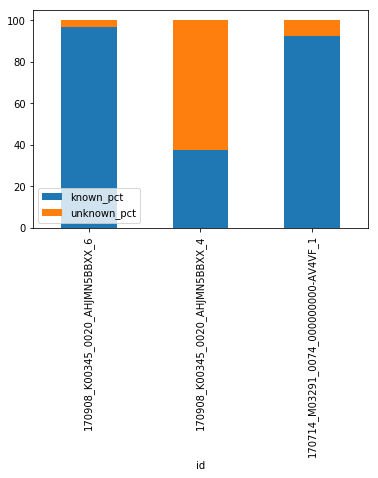

In [191]:
plt.show()

In [192]:
import math

In [194]:
math.log2(64015463)

25.931917095869373

In [198]:
math.log2(0.154701)

-2.692445572370756

In [206]:
data['log_total_read']=data['total_read'].map(lambda x: math.log2(x))

In [207]:
data.head()

,index,lane,reads,runid,sample,tag,total_read,mapping_ratio,log_total_read
4,ACTTGA,6,64015463,170908_K00345_0020_AHJMN5BBXX,IGF0008601_5,known,413800538,0.154701,28.62436
3,GCCAAT,6,66220700,170908_K00345_0020_AHJMN5BBXX,IGF0008601_4,known,413800538,0.160030,28.62436
2,ACAGTG,6,76514482,170908_K00345_0020_AHJMN5BBXX,IGF0008601_3,known,413800538,0.184907,28.62436
1,TGACCA,6,95437540,170908_K00345_0020_AHJMN5BBXX,IGF0008601_2,known,413800538,0.230637,28.62436
0,CGATGT,6,99450906,170908_K00345_0020_AHJMN5BBXX,IGF0008601_1,known,413800538,0.240335,28.62436


In [228]:
fig, ax=plt.subplots()

In [229]:
for gk,gr in data.groupby('tag'):
    if gk=='known':
      ax.scatter(x=gr['log_total_read'],y=gr['mapping_ratio'],color='green')
    elif gk=='unknown':
      ax.scatter(x=gr['log_total_read'],y=gr['mapping_ratio'],color='blue')  

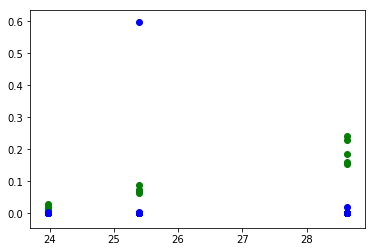

In [230]:
plt.show()